In [1]:
import numpy
import matplotlib
from scipy import signal
import scipy.fftpack
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt 
from matplotlib import rc
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data=np.loadtxt('Winter_2009.txt',skiprows=1)

In [3]:
y=zeros(128)
fof2=data[:,1]

print fof2

[ 3.07  3.13  3.29  3.46  3.5   3.41  3.29  3.12  3.05  3.11  3.07  3.3
  3.46  3.59  3.29  3.61  3.69  3.57  3.27  3.18  3.57  3.68  3.52  3.32
  3.08  2.98  2.95  3.08  3.15  3.32  3.4   3.5   3.66  3.33  3.47  3.91
  3.34  3.22  3.18  3.23  3.15  3.2   2.98  3.26  3.31  3.23  3.09  3.08
  3.14  3.4   3.25  3.15  3.14  3.37  3.16  3.25  3.63  3.69  3.41  3.49
  3.46  3.52  3.7   3.79  3.35  3.38  3.58  3.89  3.43  3.56  3.69  3.74
  3.64  3.56  3.53  4.21  3.73  3.81  3.82  3.83  3.77  3.89  3.99  3.92
  3.9   3.09  3.78  3.81  3.93  3.94]


In [4]:
N=len(fof2)
y[:N]=fof2[:N]-mean(fof2[:N])
t=arange(N)
#print y
#print sum(fof2)
#print N

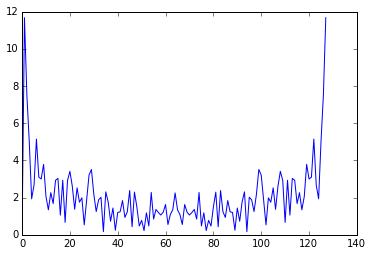

In [5]:
Y=scipy.fftpack.fft(y)
plot(abs(Y))
#print Y

2.04281036531e-14


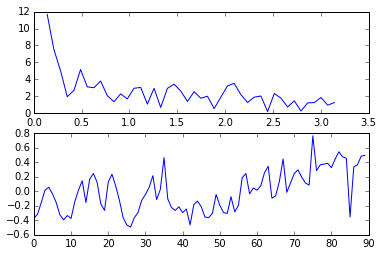

In [6]:
dt=1
Fmax=pi/dt
Fmin=2*pi/N
fr=arange(Fmin,Fmax+Fmin,Fmin)
subplot(211)
plot(fr[1:],abs(Y[1:N/2]))
subplot(2,1,2)
plot(t,y[:N]) 
print(abs(Y[0]))

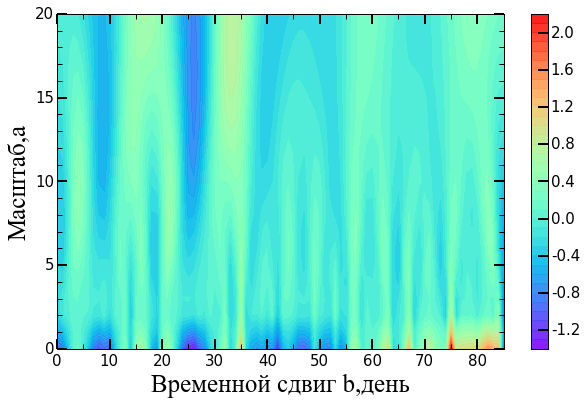

In [8]:
#majorLocator = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
#xminorLocator = MultipleLocator(5)
#yminorLocator = MultipleLocator(1)
width=arange(0.1,N/4,0.2)
wmatr=signal.cwt(y[:N],signal.ricker,width)
fig, ax = plt.subplots()

#contourf(wmatr)
contourf(wmatr, 40, cmap=cm.rainbow,alpha=0.9)
colorbar(format='%.1f')
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
xlim(0,85,5)
ylim(0,20,1)
plt.xlabel(u'Временной сдвиг b,день', {'fontname':'Times New Roman'},size=25, color='black') #подпись осей
plt.ylabel(u'Масштаб,a', {'fontname':'Times New Roman'},size=25, color='black')
rcParams['figure.figsize'] = (10, 6) #размер картинки
rcParams['lines.linewidth'] = 2 #ширина линии
rcParams['font.size']= 15 #размер шрифта
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
#plt.tight_layout() # автоматическое выравнивание элементов на холсте plt
#savefig('Wavelet_2009.png',dpi=1200)
